In [1]:
bucket_uri = "s3://jcsalazaru-almacenamiento/raw/house-prices/Housing.csv"

In [2]:
import dotenv

dotenv.load_dotenv()

import boto3



In [3]:
URI = "s3://jcsalazaru-almacenamiento/raw/house-prices/Housing.csv"

In [4]:
import os

In [5]:
print(os.getenv('test'))

hello


In [39]:
import boto3
from urllib.parse import urlparse
import pandas as pd
from io import StringIO, BytesIO

In [40]:
def read_from_s3(bucket_name, file_key, file_type='csv'):
    """
    Read data directly from S3
    Args:
        bucket_name (str): Name of the S3 bucket
        file_key (str): Path to the file in the bucket
        file_type (str): Type of file to read ('csv' or 'parquet')
    """
    try:
        # Initialize S3 client
        s3_client = boto3.client(
            's3',
            aws_access_key_id=os.getenv('aws_access_key_id'),
            aws_secret_access_key=os.getenv('aws_secret_access_key'),
            aws_session_token=os.getenv('aws_session_token')
        )
        
        # Get the object from S3
        obj = s3_client.get_object(
            Bucket=bucket_name,
            Key=file_key
        )
        
        # Read the data stream based on file type
        if file_type.lower() == 'csv':
            df = pd.read_csv(obj['Body'])
        elif file_type.lower() == 'parquet':
            buffer = BytesIO(obj['Body'].read())
            df = pd.read_parquet(buffer)
        else:
            raise ValueError(f"Unsupported file type: {file_type}. Use 'csv' or 'parquet'")
        
        return df
    
    except Exception as e:
        print(f"Error reading from S3: {str(e)}")
        return None
# Example usage:
# For CSV:
# df = read_from_s3(HOUSING_BUCKET, HOUSING_S3_KEY, file_type='csv')
# For Parquet:
# df = read_from_s3(HOUSING_BUCKET, HOUSING_S3_KEY, file_type='parquet')

In [41]:

# Your exact bucket and key values
HOUSING_BUCKET = "jcsalazaru-almacenamiento"
HOUSING_S3_KEY = "raw/house-prices/Housing.csv"


In [42]:
df = read_from_s3(HOUSING_BUCKET, HOUSING_S3_KEY)

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:

# Your S3 path for the parquet file
S3_BUCKET = "jcsalazaru-almacenamiento"
S3_KEY_TRUSTED = "trusted/housing/Housing.parquet/part-00000-84de5176-05f5-4259-b795-c2ff88ce07e5-c000.snappy.parquet"


In [49]:
# Read the data
df = read_from_s3(S3_BUCKET, S3_KEY_TRUSTED, file_type='parquet')

In [51]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_index,furnishingstatus_vec,log_price,log_area
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,furnished,2.0,"{'type': 0, 'size': 2, 'indices': [], 'values'...",16.403275,8.911934
1,12250000,8960,4,4,4,0,0,0,0,0,3,0,furnished,2.0,"{'type': 0, 'size': 2, 'indices': [], 'values'...",16.321036,9.100526
2,12250000,9960,3,2,2,0,0,0,0,0,2,0,semi-furnished,0.0,"{'type': 0, 'size': 2, 'indices': [0], 'values...",16.321036,9.206332
3,12215000,7500,4,2,2,0,0,0,0,0,3,0,furnished,2.0,"{'type': 0, 'size': 2, 'indices': [], 'values'...",16.318175,8.922658
4,11410000,7420,4,1,2,0,0,0,0,0,2,0,furnished,2.0,"{'type': 0, 'size': 2, 'indices': [], 'values'...",16.250001,8.911934


In [52]:
"prediction" in df.columns

False

In [47]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'furnishingstatus_index',
       'furnishingstatus_vec', 'log_price', 'log_area'],
      dtype='object')

In [78]:
S3_KEY_REFINED = "refined/housing/Housing.parquet/part-00000-d3e1157b-a9f7-4fe7-a5fa-9f4818e2b222-c000.snappy.parquet"

In [79]:
df_predictions = read_from_s3(S3_BUCKET, S3_KEY_REFINED, file_type='parquet')

In [80]:
df_predictions.head()

,prediction,price,normal_prediction,error,error_percentage,absolute_error
0,15.067896,1750000,3.498681e+06,-1.748681e+06,-99.924608,1.748681e+06
1,14.750444,1890000,2.547045e+06,-6.570447e+05,-34.764269,6.570447e+05
2,15.114776,1960000,3.666601e+06,-1.706601e+06,-87.071455,1.706601e+06
3,15.099529,2233000,3.611123e+06,-1.378123e+06,-61.716209,1.378123e+06
4,14.907182,2345000,2.979251e+06,-6.342509e+05,-27.046948,6.342509e+05


In [60]:
df_predictions.normal_prediction.head()

0    3.498681e+06
1    2.547045e+06
2    3.666601e+06
3    3.611123e+06
4    2.979251e+06
Name: normal_prediction, dtype: float64

In [61]:
df_predictions.normal_prediction.describe()

count    8.300000e+01
mean     4.633577e+06
std      1.267308e+06
min      2.547045e+06
25%      3.634264e+06
50%      4.281143e+06
75%      5.617329e+06
max      7.377242e+06
Name: normal_prediction, dtype: float64

<Axes: >

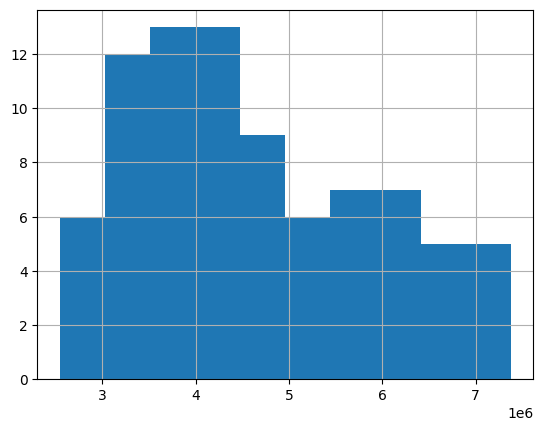

In [59]:
df_predictions.normal_prediction.hist()